In [1]:
import sklearn.datasets
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_olivetti_faces
olivetti_faces = fetch_olivetti_faces()
faces = olivetti_faces

In [3]:
Xall = faces.data.T
Xsub = Xall[:,0:200]

In [4]:
xbar = np.mean(Xsub, axis=1)
xbar = xbar.reshape(4096, 1)

In [7]:
C = np.cov(Xsub)

In [8]:
V, P = np.linalg.eigh(C)

In [9]:
X_centered = Xsub - xbar  

Ysub = P.T @ X_centered

face_index = 0  
y = Ysub[:, face_index]  

reconstructed_face = P @ y + xbar.flatten()  

print("reconstructed_face shape:", reconstructed_face.shape) 

reconstructed_face shape: (4096,)


In [10]:
original_face = Xsub[:, face_index]
print("Are the original and reconstructed face close to each other?",
      np.allclose(reconstructed_face, original_face))

Are the original and reconstructed face close to each other? True


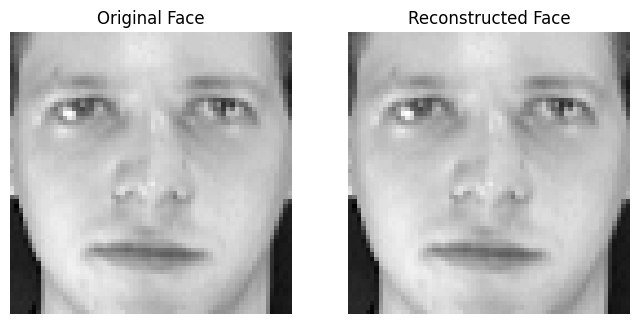

In [11]:
plt.figure(figsize=(8, 4))

# Plot the original face
plt.subplot(1, 2, 1)
plt.imshow(original_face.reshape(64, 64), cmap='gray')
plt.title("Original Face")
plt.axis('off')

# Plot the reconstructed face
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_face.reshape(64, 64), cmap='gray')
plt.title("Reconstructed Face")
plt.axis('off')

plt.show()